In [11]:
pip install scikit-lego

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples, rand_score, adjusted_rand_score

In [13]:
df = pd.read_csv("hf://datasets/maharshipandya/spotify-tracks-dataset/dataset.csv")

In [14]:
#Checking loading of data frame
df.head(5)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## Apply cleaning function

Going to look at clustering popular music genres (Pop, Rock,Hip-Hop,Electronic,Indie, Country, Jazz, Latin, Reggae, Blues)


1.   pop
2.   rock
3. hip-hop
4. electronic
5. indie
6. blues
7. county
8. jazz
9. latin
10. reggae



In [15]:
# Data Cleaning Function (modify)
def clean_data(df):
  clean_df = df.copy()
  clean_df = clean_df.drop('Unnamed: 0', axis=1, errors='ignore')
  clean_df = clean_df.dropna()

  #Encode explicit column (binary encoding)
  clean_df['explicit'] = clean_df['explicit'].astype(int)

  # Drop track_id, artisits,album_name
  clean_df = clean_df.drop(['track_id', 'artists', 'album_name'], axis=1)

  # Lets look at clustering only track_genre (Pop, Rock,Hip-Hop,Electronic,Indie, blues, Country, Jazz, Latin, Reggae)
  genres_to_keep = ['pop', 'rock', 'hip-hop', 'electronic', 'indie', 'blues ','country', 'jazz', 'latin', 'reggae']
  clean_df = clean_df[clean_df['track_genre'].isin(genres_to_keep)]
  track_genre_mapping = {'pop': 0, 'rock': 1, 'hip-hop': 2, 'electronic': 3, 'indie': 4, 'blues ': 5, 'country': 6, 'jazz': 7, 'latin': 8, 'reggae': 9}
  clean_df['track_genre'] = clean_df['track_genre'].map(track_genre_mapping)

  return clean_df

# Apply the function to the DataFrame
spotify_clean = clean_data(df)

In [16]:
#Looking at cleaned data frame
spotify_clean.sample(15)

,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
19744,Born To Be Wild - Single Version,1,216693,0,0.468,0.810,9,-8.330,1,0.0724,0.001690,0.031400,0.5670,0.4640,145.589,4,6
67573,Nada,1,174026,0,0.684,0.808,0,-2.737,1,0.0610,0.051800,0.000010,0.0858,0.7120,173.905,4,8
88095,Amarillo,0,158146,0,0.876,0.850,1,-5.750,0,0.1630,0.011800,0.006700,0.1110,0.9620,122.666,5,9
57548,Winter Song,0,254437,0,0.314,0.309,2,-3.809,1,0.0312,0.855000,0.000005,0.1230,0.2150,171.132,3,4
88749,12:30,51,170571,0,0.802,0.771,6,-3.058,1,0.0675,0.007990,0.004000,0.0999,0.7940,91.993,4,9
32443,Come Closer Girl - Retrolove Edit,0,178264,0,0.626,0.809,8,-6.709,0,0.0364,0.001870,0.153000,0.4290,0.3830,123.983,4,3
67743,Perreito - Remix,0,213333,0,0.792,0.703,0,-3.057,1,0.2560,0.283000,0.000164,0.3190,0.7260,180.032,4,8
67403,Calla Tú,0,161813,0,0.784,0.631,6,-4.005,0,0.0322,0.047500,0.007920,0.1420,0.2740,99.973,4,8
88705,MAMIII,85,226088,0,0.843,0.700,4,-3.563,0,0.0803,0.093400,0.000000,0.1400,0.8990,93.991,4,9
88511,Brilloteo,1,258560,0,0.718,0.735,1,-4.854,1,0.0369,0.091700,0.000000,0.1880,0.4000,109.999,4,9


In [17]:
#Split into X and y
X = spotify_clean.drop('track_genre', axis=1)
y = spotify_clean['track_genre']

In [44]:
# Normalize data after the 1st column
ss = StandardScaler()
X_scaled = ss.fit_transform(X[X.columns[1:]])

# Find cluster centers
kmeans = KMeans(n_clusters=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)
kmeans.cluster_centers_

array([[ 9.90441942e-01,  6.22187912e-01, -3.42560042e-01,
        -2.63030831e-01, -3.30564217e-01, -1.35561199e-01,
        -1.87975096e-01, -6.10137979e-03, -3.94548348e-01,
         2.11125942e-01, -1.98369328e-01, -2.68633467e-01,
        -6.71527329e-01, -3.00032008e-01,  1.80904060e-01],
       [ 1.97070266e-01,  1.60773155e-01, -2.05762212e-01,
        -8.09643516e-02,  4.71484625e-01,  8.11444874e-02,
         2.07712509e-01, -1.11089676e-01,  9.73309006e-02,
        -2.24187751e-01, -6.20058429e-02,  3.55807431e+00,
         2.59820399e-01,  2.36361837e-01,  1.88269996e-01],
       [ 4.93764857e-01,  8.84316941e-01, -3.09454035e-01,
        -6.80503063e-02, -2.06241967e-01,  9.76733955e-02,
        -8.77117654e-01, -2.35722339e-01, -2.89785380e-01,
         1.92832085e-02,  4.14044488e+00, -2.05582133e-01,
        -9.88641099e-01, -5.52609332e-02,  1.08728734e-01],
       [-2.02066547e-01, -8.55940106e-02, -2.51160814e-01,
        -1.11736453e+00, -1.44776004e+00, -1.68329800

## Visualizing Clusters and Cluster Centers

[[ 9.90441942e-01  6.22187912e-01 -3.42560042e-01 -2.63030831e-01
  -3.30564217e-01 -1.35561199e-01 -1.87975096e-01 -6.10137979e-03
  -3.94548348e-01  2.11125942e-01 -1.98369328e-01 -2.68633467e-01
  -6.71527329e-01 -3.00032008e-01  1.80904060e-01]
 [ 1.97070266e-01  1.60773155e-01 -2.05762212e-01 -8.09643516e-02
   4.71484625e-01  8.11444874e-02  2.07712509e-01 -1.11089676e-01
   9.73309006e-02 -2.24187751e-01 -6.20058429e-02  3.55807431e+00
   2.59820399e-01  2.36361837e-01  1.88269996e-01]
 [ 4.93764857e-01  8.84316941e-01 -3.09454035e-01 -6.80503063e-02
  -2.06241967e-01  9.76733955e-02 -8.77117654e-01 -2.35722339e-01
  -2.89785380e-01  1.92832085e-02  4.14044488e+00 -2.05582133e-01
  -9.88641099e-01 -5.52609332e-02  1.08728734e-01]
 [-2.02066547e-01 -8.55940106e-02 -2.51160814e-01 -1.11736453e+00
  -1.44776004e+00 -1.68329800e-01 -1.11132024e+00  1.82344494e-01
  -4.46954239e-01  1.36236775e+00 -1.38510358e-01 -1.09090423e-01
  -8.49187544e-01 -7.30124727e-03 -3.17645956e+00]
 [ 2

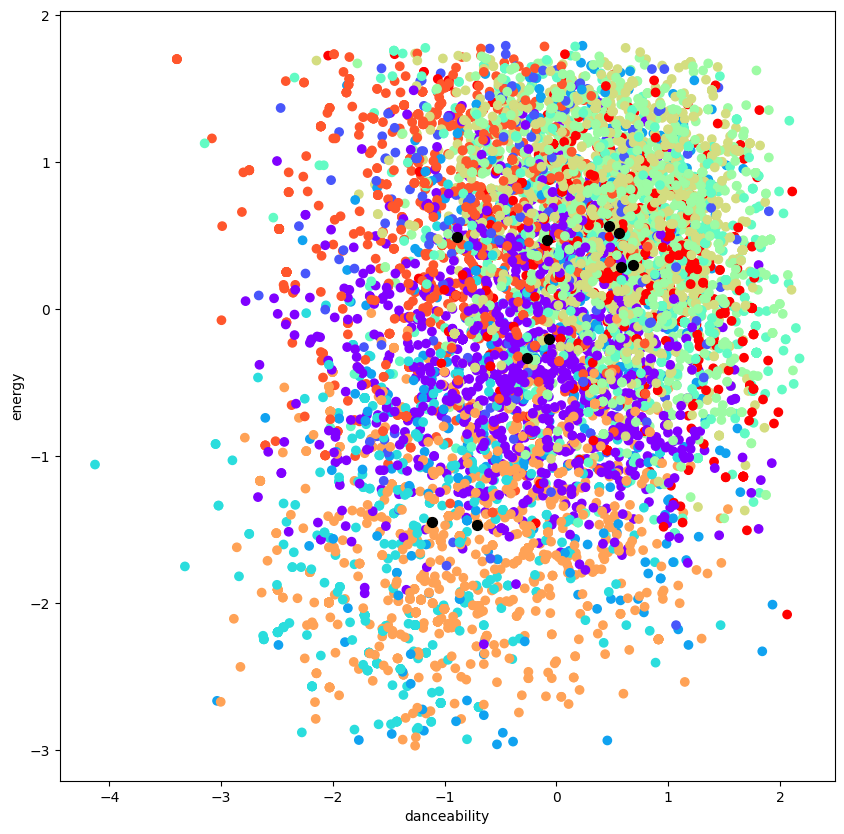

In [45]:
# Find centroids
centroids = kmeans.cluster_centers_
print(centroids)

# Scatter plot showing clusters ???
plt.figure(figsize=(10,10))
plt.scatter(X_scaled[:,3], X_scaled[:,4], c = y_kmeans, cmap = 'rainbow')
plt.scatter(centroids[:, 3], centroids[:, 4], c='black', s=50)
plt.xlabel('danceability')
plt.ylabel('energy')
plt.show()

In [34]:
spotify_clean.shape

(9000, 17)

In [37]:
# Try hierarchical clustering
hclust = AgglomerativeClustering(n_clusters=10, metric='euclidean', linkage='ward')
hclust_labels = hclust.fit(X_scaled).labels_

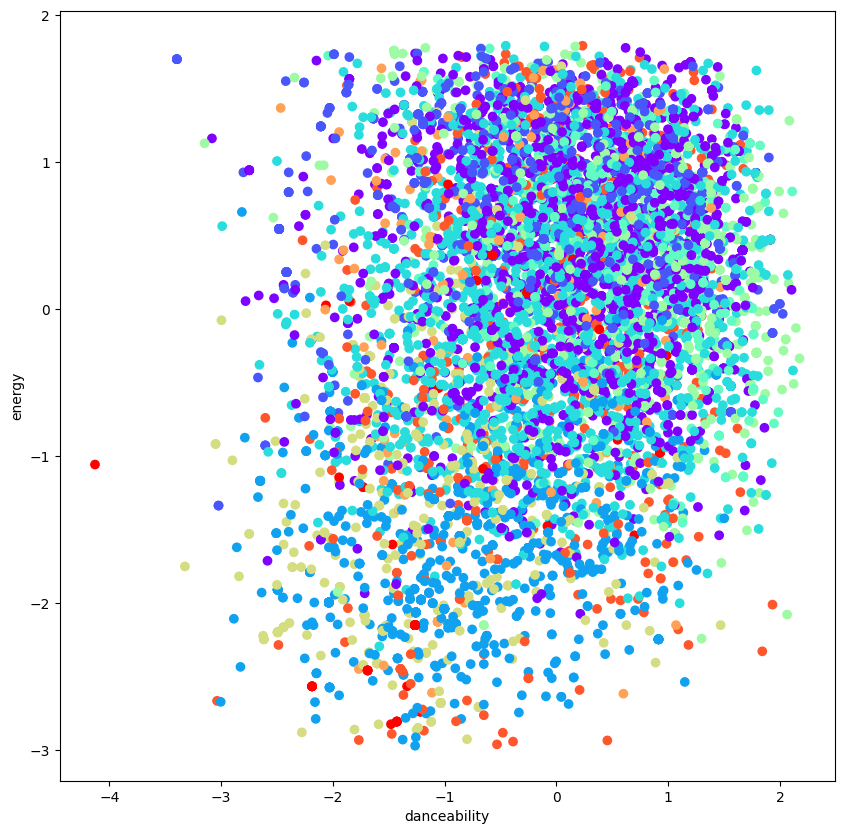

In [38]:
# Visualize hierarchical clustering
plt.figure(figsize=(10,10))
plt.scatter(X_scaled[:,3], X_scaled[:,4], c = hclust_labels, cmap = 'rainbow')
plt.xlabel('danceability')
plt.ylabel('energy')
plt.show()

## Cross Validation to determine number of clusters

We do not need to cross validate because we know we have 10 clusters because we are choosing to do it based on 10 genres.

## PCA and/or Clustering

If you apply PCA to your data, include code, cumulative variability explained, and scree plot. Explain how you are using PCA in your project for dimensionality reduction or to learn structure in the data.

If you apply clustering, include code. quantitative metrics to evaluate clustering, and how you determined the number of clusters for your data and why. Explain how clustering helped you learn about the structure of data for your project.

In [31]:
# Metrics to compare clustering metrics (inertia, sihoutte score, rand score, adj rand score)
# Inertia
print("Inertia (K-Means):", kmeans.inertia_)
#Sihouttee Score
print("Silhouette Score (K-Means):", silhouette_score(X_scaled, y_kmeans))
print("Silhouette Score (Hierarchical):", silhouette_score(X_scaled, hclust_labels))

#Rand Score
print("Rand Score (K-Means):", rand_score(y, y_kmeans))
print("Rand Score (Hierarchical):", rand_score(y, hclust_labels))

#Adj Rand Score
print("Adj Rand Score (K-Means):", adjusted_rand_score(y, y_kmeans))
print("Adj Rand Score (Hierarchical):", adjusted_rand_score(y, hclust_labels))

Inertia (K-Means): 75236.33305445878
Silhouette Score (K-Means): 0.11847516157334351
Silhouette Score (Hierarchical): 0.09894210313068551
Rand Score (K-Means): 0.808133669173118
Rand Score (Hierarchical): 0.7893005148720228
Adj Rand Score (K-Means): 0.07710065290691398
Adj Rand Score (Hierarchical): 0.07178346486588089


Explain how clustering helped you learn about the structure of data for your project.

K-means clustering is a better for indetifying possible underlying patterns for 10 genres since its rand score is slightly better than the hierarchical score. This helped me understand how some genres share overlapping characteristics, such as Pop and EDM, which often have high energy and danceability. The relatively low silhouette and adjusted Rand scores revealed that the dataset might not have well-defined clusters.

Only kept 10 clusters in order to try to cluster 10 popular genres, since there are over 100 genres so trying to cluster over 100 genres would not make sense.